<a href="https://colab.research.google.com/github/moanshori-zerone/DNA-Seq-of-Hepatitis-Classification-using-CNN/blob/main/Hepatitis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from Bio import SeqIO

# Define the directory containing the FASTA files
fasta_dir = '/content/drive/My Drive/Research/Hepatitis/ds'

# List to store all loaded sequences, now including class information
sequences_with_class_data = []

# Check if the directory exists
if not os.path.exists(fasta_dir):
    print(f"Error: Directory '{fasta_dir}' not found.")
else:
    print(f"Re-loading sequences with class information from: {fasta_dir}")
    for filename in os.listdir(fasta_dir):
        if filename.endswith(".fasta") or filename.endswith(".fa") or filename.endswith(".fna"):
            filepath = os.path.join(fasta_dir, filename)
            try:
                # Extract class name from filename (e.g., 'HAV' from 'HAV_sequences.fasta')
                # This assumes filenames are in the format 'CLASS_sequences.fasta'
                class_name = os.path.splitext(filename)[0].split('_')[0]
                print(f"  Loading from {filename}, assigning class: {class_name}")
                for record in SeqIO.parse(filepath, "fasta"):
                    sequences_with_class_data.append({
                        'id': record.id,
                        'sequence': str(record.seq),
                        'length': len(record.seq),
                        'description': record.description,
                        'class': class_name
                    })
            except Exception as e:
                print(f"Error loading {filename}: {e}")

print(f"\nSuccessfully re-loaded a total of {len(sequences_with_class_data)} sequences with class information.")

# Create DataFrame
df = pd.DataFrame(sequences_with_class_data)

print("\nDataFrame created successfully. Here are the first 5 rows:")
print(df.head())

print(f"\nDataFrame shape: {df.shape}")
print("Unique classes found:")
print(df['class'].unique())

Re-loading sequences with class information from: /content/drive/My Drive/Research/Hepatitis/ds
  Loading from HAV_sequences.fasta, assigning class: HAV
  Loading from HBV_sequences.fasta, assigning class: HBV
  Loading from HCV_sequences.fasta, assigning class: HCV
  Loading from HDV_sequences.fasta, assigning class: HDV
  Loading from HEV_sequences.fasta, assigning class: HEV

Successfully re-loaded a total of 500 sequences with class information.

DataFrame created successfully. Here are the first 5 rows:
               id                                           sequence  length  \
0  NM_001135797.1  AGGGGTGGGCGCCAGCTCCCTGCACGCCCTGAGCTTCTATCGTAGG...    1328   
1      PX620280.1  GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...     450   
2      PX620279.1  GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...     450   
3      PX620278.1  GATGAATATTTGTCTTTTAGTTGTTACTTGTCTGTCACAGAACAAT...     450   
4      PX620277.1  GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...     450   

     

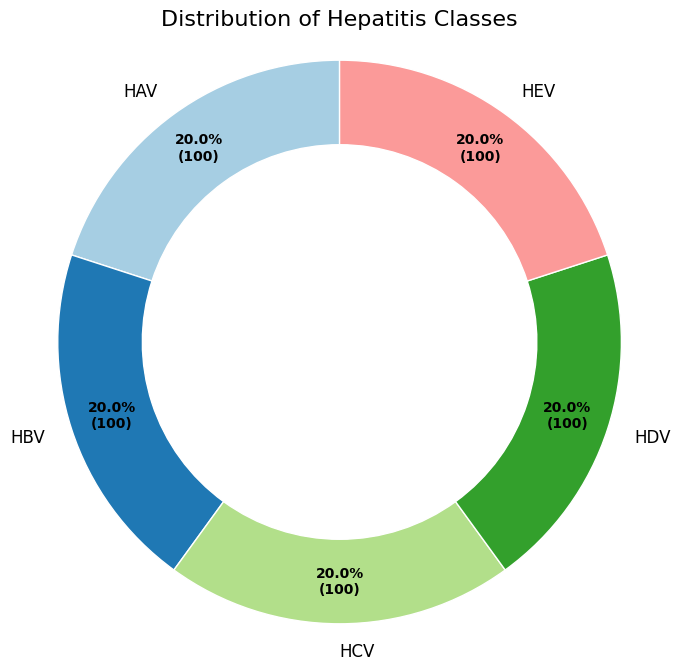

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['class'].value_counts()

# Prepare data for the doughnut chart
labels = class_counts.index
sizes = class_counts.values

# Define a custom color palette (optional)
colors = plt.cm.Paired(range(len(labels)))

# Function to display both percentage and absolute count
def autopct_format(pct):
    total = sum(sizes)
    val = int(round(pct*total/100.0))
    return '{:.1f}%\n({:d})'.format(pct, val)

# Create the doughnut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct=autopct_format, startangle=90,
                                  pctdistance=0.85, colors=colors,
                                  wedgeprops=dict(width=0.3, edgecolor='w'))

# Draw a circle in the center to make it a doughnut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a title
plt.title('Distribution of Hepatitis Classes', fontsize=16)

# Adjust autopct text properties
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.setp(texts, size=12)

plt.show()

/tmp/ipython-input-2540196872.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=class_counts, palette='viridis')


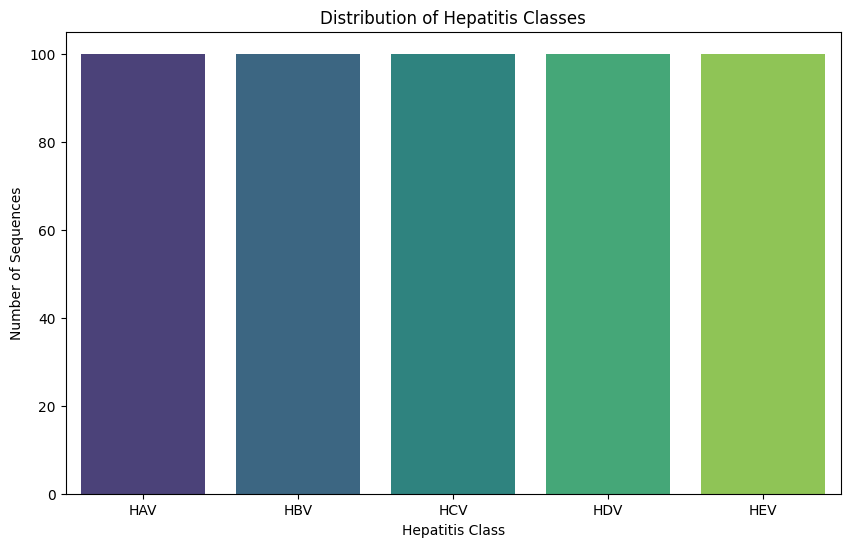

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = df['class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=class_counts, palette='viridis')
plt.title('Distribution of Hepatitis Classes')
plt.xlabel('Hepatitis Class')
plt.ylabel('Number of Sequences')
plt.show()

In [ ]:
import numpy as np

def one_hot_encode_dna(sequence):
    mapping = {
        'A': [1, 0, 0, 0],
        'C': [0, 1, 0, 0],
        'G': [0, 0, 1, 0],
        'T': [0, 0, 0, 1],
        'N': [0, 0, 0, 0] # Handle unknown bases
    }
    encoded_sequence = []
    for char in sequence.upper(): # Convert to uppercase to handle mixed case
        encoded_sequence.append(mapping.get(char, [0, 0, 0, 0])) # Default to all zeros for unknown
    return np.array(encoded_sequence)

# Apply the one-hot encoding function to the 'sequence' column
df['one_hot_encoded'] = df['sequence'].apply(one_hot_encode_dna)

print("DataFrame with 'one_hot_encoded' column:")
print(df[['sequence', 'one_hot_encoded']].head())

print(f"\nShape of the first one-hot encoded sequence: {df['one_hot_encoded'].iloc[0].shape}")
print(f"Example of a one-hot encoded sequence for 'AGCT':\n{one_hot_encode_dna('AGCT')}")

DataFrame with 'one_hot_encoded' column:
                                            sequence  \
0  AGGGGTGGGCGCCAGCTCCCTGCACGCCCTGAGCTTCTATCGTAGG...   
1  GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...   
2  GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...   
3  GATGAATATTTGTCTTTTAGTTGTTACTTGTCTGTCACAGAACAAT...   
4  GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...   

                                     one_hot_encoded  
0  [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0,...  
1  [[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,...  
2  [[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,...  
3  [[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,...  
4  [[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,...  

Shape of the first one-hot encoded sequence: (1328, 4)
Example of a one-hot encoded sequence for 'AGCT':
[[1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


In [ ]:
df

,id,sequence,length,description,class,one_hot_encoded
0,NM_001135797.1,AGGGGTGGGCGCCAGCTCCCTGCACGCCCTGAGCTTCTATCGTAGG...,1328,NM_001135797.1 Macaca mulatta interferon regul...,HAV,"[[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0,..."
1,PX620280.1,GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...,450,PX620280.1 Hepatovirus ahepa isolate ISS143_So...,HAV,"[[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,..."
2,PX620279.1,GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...,450,PX620279.1 Hepatovirus ahepa isolate ISS142_So...,HAV,"[[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,..."
3,PX620278.1,GATGAATATTTGTCTTTTAGTTGTTACTTGTCTGTCACAGAACAAT...,450,PX620278.1 Hepatovirus ahepa isolate ISS141_So...,HAV,"[[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,..."
4,PX620277.1,GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...,450,PX620277.1 Hepatovirus ahepa isolate ISS138_So...,HAV,"[[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,..."
...,...,...,...,...,...,...
495,PX108710.1,GGTCGATGCCATGGAGGCCCATCAGTTTATCAAGGCTCCTGGCATT...,6812,PX108710.1 Paslahepevirus balayani isolate 306...,HEV,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,..."
496,PX108709.1,GGTCGATGCCATGGAGGCCCATCAGTTCATTAAGGCTCCTGGCATT...,6640,PX108709.1 Paslahepevirus balayani isolate 306...,HEV,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,..."
497,PX108708.1,CCATCAGTTTATTAAGGCTCCTGGCATTACTACTGCCATTGAGCAG...,7124,PX108708.1 Paslahepevirus balayani isolate 306...,HEV,"[[0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0,..."
498,PX108707.1,ACGCCATGGAGGCCCATCAGTTCATTAAGGCTCCTGGCATTACTAC...,7107,PX108707.1 Paslahepevirus balayani isolate 305...,HEV,"[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0,..."


In [ ]:
max_length = df['length'].max()
min_length = df['length'].min()

print(f"Maximum sequence length: {max_length}")
print(f"Minimum sequence length: {min_length}")

Maximum sequence length: 39644
Minimum sequence length: 17


In [ ]:
def calculate_gc_content(sequence):
    gc_count = sequence.count('G') + sequence.count('C') + sequence.count('g') + sequence.count('c')
    total_bases = len(sequence)
    if total_bases == 0:
        return 0
    return (gc_count / total_bases) * 100

# Apply the function to the 'sequence' column to create the 'GC_content' column
df['GC_content'] = df['sequence'].apply(calculate_gc_content)

print("DataFrame with 'GC_content' column:")
print(df[['sequence', 'GC_content']].head())
print(f"\nDataFrame shape after adding GC_content: {df.shape}")

DataFrame with 'GC_content' column:
                                            sequence  GC_content
0  AGGGGTGGGCGCCAGCTCCCTGCACGCCCTGAGCTTCTATCGTAGG...   62.198795
1  GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...   39.111111
2  GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...   39.111111
3  GATGAATATTTGTCTTTTAGTTGTTACTTGTCTGTCACAGAACAAT...   39.111111
4  GATGAATATTTGTCCTTTAGTTGTTATTTGTCTGTTACAGAACAAT...   39.111111

DataFrame shape after adding GC_content: (500, 7)


/tmp/ipython-input-1896599579.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Mean_GC_Content', data=mean_gc_content_by_class, palette='coolwarm')


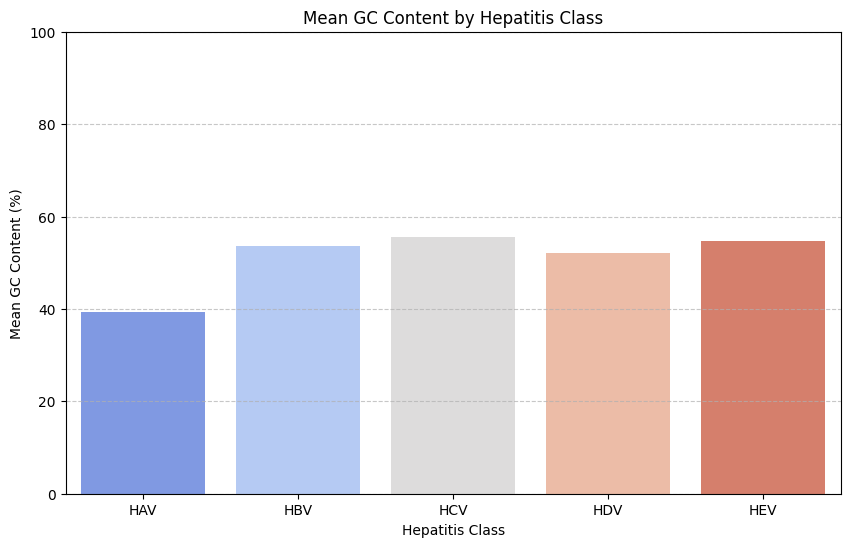

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean GC content for each class
mean_gc_content_by_class = df.groupby('class')['GC_content'].mean().reset_index()
mean_gc_content_by_class.columns = ['Class', 'Mean_GC_Content']

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Mean_GC_Content', data=mean_gc_content_by_class, palette='coolwarm')
plt.title('Mean GC Content by Hepatitis Class')
plt.xlabel('Hepatitis Class')
plt.ylabel('Mean GC Content (%)')
plt.ylim(0, 100) # GC content is a percentage, so limits are 0-100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Task
Prepare the data for the CNN model by extracting 'one_hot_encoded' sequences and 'class' labels. Pad or truncate the sequences to a uniform length and encode the 'class' labels numerically.

## Prepare Data for CNN

### Subtask:
Extract the 'one_hot_encoded' sequences and 'class' labels from the DataFrame. Pad or truncate the sequences to a uniform length suitable for CNN input. Encode the categorical 'class' labels into a numerical format.


**Reasoning**:
I need to analyze the distribution of sequence lengths to determine a suitable uniform length for CNN input. Plotting a histogram of sequence lengths will help visualize this distribution.



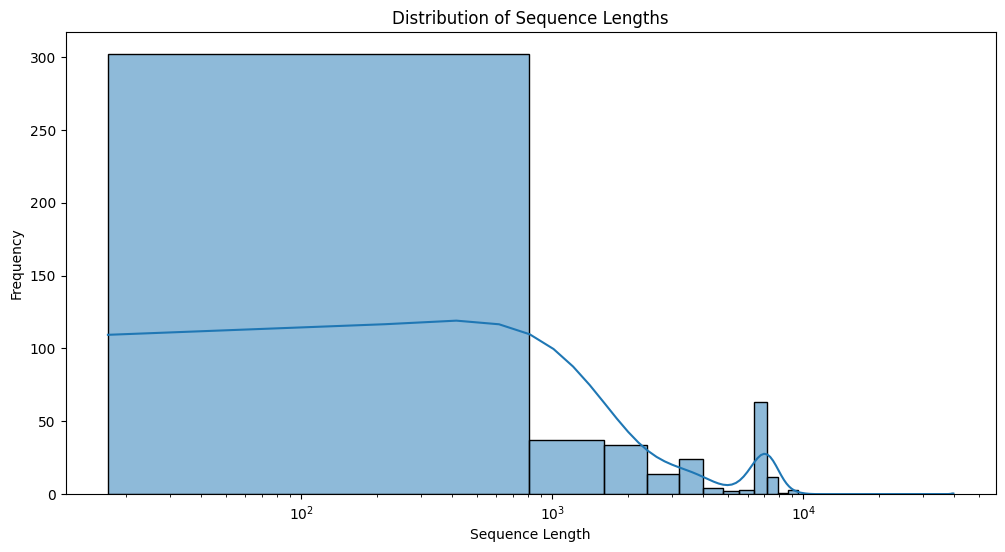

Descriptive statistics for sequence lengths:
count      500.000000
mean      1926.204000
std       3025.898362
min         17.000000
25%        315.000000
50%        450.000000
75%       2665.250000
max      39644.000000
Name: length, dtype: float64

Percentiles of sequence lengths:
0.10      31.80
0.25     315.00
0.50     450.00
0.75    2665.25
0.90    7064.40
0.95    7135.40
0.99    7237.11
Name: length, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sequence lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['length'], bins=50, kde=True)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.xscale('log') # Use log scale for better visualization if lengths vary widely
plt.show()

# Also print some descriptive statistics for sequence lengths
print("Descriptive statistics for sequence lengths:")
print(df['length'].describe())

# Calculate percentiles to help choose a uniform length
print("\nPercentiles of sequence lengths:")
print(df['length'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

**Reasoning**:
Now that the sequence length distribution has been analyzed, I will determine a uniform sequence length, create a function to pad or truncate the one-hot encoded sequences to that length, apply it to the DataFrame, and then encode the class labels into a numerical (one-hot) format suitable for a CNN.



In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# 1. Determine a uniform sequence length
# Based on the analysis, a length of 2000 will cover a significant portion of the sequences
# without being excessively long, balancing information retention and computational efficiency.
max_seq_length = 2000

# 2. Create a function to pad or truncate each 'one_hot_encoded' sequence
def pad_truncate_sequence(encoded_sequence, target_length):
    current_length = encoded_sequence.shape[0]
    if current_length > target_length:
        # Truncate if longer
        return encoded_sequence[:target_length]
    elif current_length < target_length:
        # Pad with zeros if shorter
        padding_needed = target_length - current_length
        padding = np.zeros((padding_needed, encoded_sequence.shape[1]))
        return np.vstack((encoded_sequence, padding))
    else:
        return encoded_sequence

# 3. Apply the function and convert to a single NumPy array (X)
X = np.array([pad_truncate_sequence(seq, max_seq_length) for seq in df['one_hot_encoded']])

# 4. Encode the 'class' labels into numerical format (y)
# First, use LabelEncoder to convert categorical names to integer labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['class'])

# Then, use to_categorical to one-hot encode these integer labels
y = to_categorical(integer_encoded)

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (labels): {y.shape}")
print("First 5 one-hot encoded labels:")
print(y[:5])
print("Original classes for first 5 labels:")
print(df['class'].head())
print("Class labels mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")


Shape of X (features): (500, 2000, 4)
Shape of y (labels): (500, 5)
First 5 one-hot encoded labels:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
Original classes for first 5 labels:
0    HAV
1    HAV
2    HAV
3    HAV
4    HAV
Name: class, dtype: object
Class labels mapping:
HAV: 0
HBV: 1
HCV: 2
HDV: 3
HEV: 4


## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed features and labels into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
I need to split the data into training and testing sets using `train_test_split` from `sklearn.model_selection` to prepare for model training. The split will be 80% for training and 20% for testing, with a fixed random state for reproducibility.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (400, 2000, 4)
Shape of X_test: (100, 2000, 4)
Shape of y_train: (400, 5)
Shape of y_test: (100, 5)


## Build Single Layer CNN Model

### Subtask:
Construct a neural network model using TensorFlow/Keras. This will include a single Convolutional 1D layer, followed by a Flatten layer, and then one or more Dense (Fully Connected) layers for classification.


**Reasoning**:
I need to import the necessary Keras modules and define the CNN model architecture as specified in the instructions, including input, convolutional, flatten, dense, and output layers, then print the model summary.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input, Dropout

# Get input shape from X_train and number of classes from y_train
input_shape = X_train.shape[1:]  # (2000, 4)
num_classes = y_train.shape[1]  # 5

# Initialize the Sequential model
model = Sequential()

# Add the Input layer implicitly or explicitly (explicit for clarity)
model.add(Input(shape=input_shape))

# Add a Conv1D layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
# Add Dropout after Conv1D
model.add(Dropout(0.3))

# Add a Flatten layer
model.add(Flatten())

# Add one or more Dense layers for feature extraction
model.add(Dense(100, activation='relu'))
# Add Dropout after the first Dense layer
model.add(Dropout(0.3))

# Add the final Dense layer for output classification
model.add(Dense(num_classes, activation='softmax'))

# Print the model summary
print("CNN Model Summary (with Dropout):")
model.summary()

CNN Model Summary (with Dropout):


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1996, 128)      │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1996, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 255488)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    25,548,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,552,093 (97.47 MB)

 Trainable params: 25,552,093 (97.47 MB)

 Non-trainable params: 0 (0.00 B)

The choice of filters=128 and kernel_size=5 for the Conv1D layer is based on common practices in convolutional neural networks for sequence data, balancing feature extraction capabilities with computational efficiency and biological relevance:

filters=128 (Number of Filters):

Each filter learns to detect a specific pattern or motif within the input DNA sequence. Choosing 128 filters allows the model to learn a reasonably diverse set of these patterns. It's a common intermediate value: not too few (which might limit the model's ability to capture enough features) and not too many (which could increase computational cost and the risk of overfitting, especially with smaller datasets).
kernel_size=5 (Size of the Convolutional Window):

The kernel_size determines the length of the DNA sequence segment (motif) that each filter will look at simultaneously. A kernel_size of 5 is often chosen because short sequences of 3-7 base pairs are frequently biologically meaningful (e.g., promoter elements, transcription factor binding sites, start codons, etc.) in genomics. A kernel of size 5 is small enough to capture these localized, short motifs efficiently.
It's a balance between capturing very local patterns (smaller kernel) and broader, less specific patterns (larger kernel). For initial models on DNA sequences, a kernel size of 3 or 5 is a very typical starting point.
These values are often refined through experimentation and hyperparameter tuning to find the optimal combination for a specific dataset and task.

## Compile and Train CNN Model

### Subtask:
Compile the CNN model with an appropriate optimizer, loss function (e.g., categorical cross-entropy), and metrics (e.g., accuracy). Then, train the model using the training data.


**Reasoning**:
I need to compile the CNN model with the specified optimizer, loss function, and metrics, and then train it using the provided training and validation data, storing the training history.



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define the Adam optimizer with a learning rate
optimizer = Adam(learning_rate=0.001)

history = model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

print("Model compiled and trained successfully with Early Stopping and a specified learning rate.")

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 970ms/step - accuracy: 0.4629 - loss: 3.2066 - val_accuracy: 0.7800 - val_loss: 1.1854
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 747ms/step - accuracy: 0.8513 - loss: 0.6557 - val_accuracy: 0.8600 - val_loss: 0.4263
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8884 - loss: 0.2729 - val_accuracy: 0.8700 - val_loss: 0.3863
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 711ms/step - accuracy: 0.9528 - loss: 0.1608 - val_accuracy: 0.9200 - val_loss: 0.3281
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 564ms/step - accuracy: 0.9633 - loss: 0.1115 - val_accuracy: 0.9300 - val_loss: 0.2451
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 721ms/step - accuracy: 0.9771 - loss: 0.0873 - val_accuracy: 0.9100 - val_loss: 0.3167
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 620ms/step - accuracy: 0.9870 - loss: 0.0426 - val_accuracy: 0.9200 - val_loss: 0.2556
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 589ms/step - accuracy: 0.9905 - loss: 0.0333 - val_accuracy: 

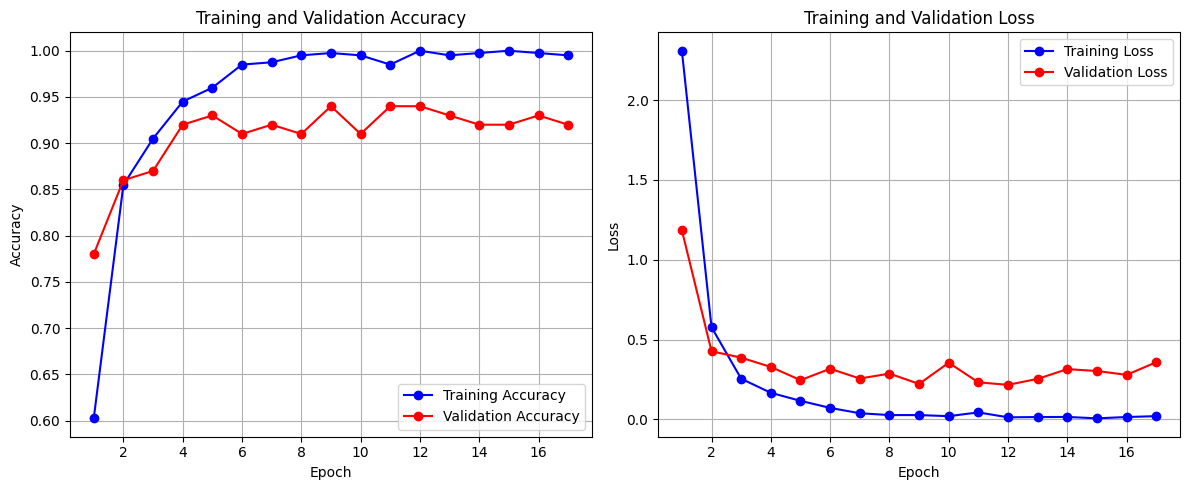

In [ ]:
import matplotlib.pyplot as plt

# Extract data from history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Evaluate Model Performance

### Subtask:
Assess the trained model's performance on the test dataset, reporting metrics such as accuracy, precision, recall, and F1-score. A classification report and confusion matrix would be beneficial.


**Reasoning**:
First, I will make predictions on the test data (`X_test`) using the trained model to obtain predicted class probabilities, which is the initial step for evaluating model performance.



In [ ]:
y_pred_probs = model.predict(X_test)
print("Predicted probabilities generated successfully.")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
Predicted probabilities generated successfully.


Overall Accuracy: 0.9400

Classification Report:

              precision    recall  f1-score   support

         HAV       1.00      1.00      1.00        20
         HBV       0.95      1.00      0.98        20
         HCV       0.86      0.95      0.90        20
         HDV       1.00      0.95      0.97        20
         HEV       0.89      0.80      0.84        20

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Class-wise Sensitivity (Recall) and Specificity:
  HAV: Sensitivity (Recall) = 1.0000, Specificity = 1.0000
  HBV: Sensitivity (Recall) = 1.0000, Specificity = 0.9875
  HCV: Sensitivity (Recall) = 0.9500, Specificity = 0.9625
  HDV: Sensitivity (Recall) = 0.9500, Specificity = 1.0000
  HEV: Sensitivity (Recall) = 0.8000, Specificity = 0.9750


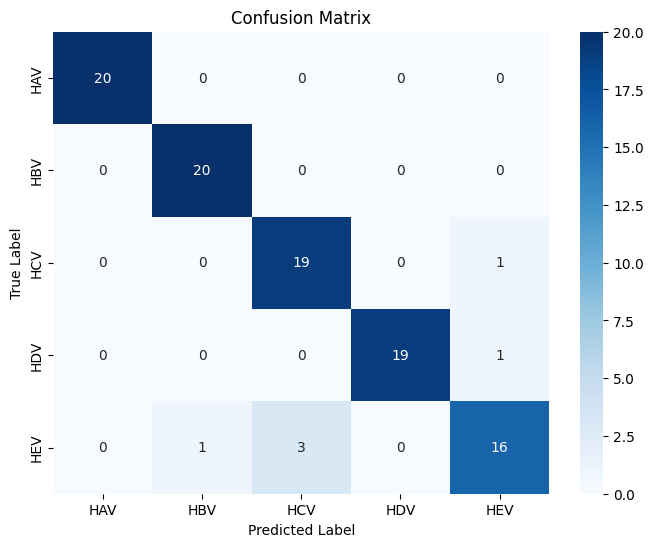

Model evaluation complete. Metrics and confusion matrix displayed.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predicted probabilities to predicted class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded true labels to true class labels
y_true_labels = np.argmax(y_test, axis=1)

# Calculate overall accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Overall Accuracy: {accuracy:.4f}\n")

# Generate classification report
# Use label_encoder.classes_ for target_names to get meaningful class names
class_names = label_encoder.classes_
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)
print("Classification Report:\n")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate Sensitivity (Recall) and Specificity for each class
sensitivity = []
specificity = []

for i in range(num_classes):
    TP = conf_matrix[i, i]
    FN = np.sum(conf_matrix[i, :]) - TP
    FP = np.sum(conf_matrix[:, i]) - TP
    TN = np.sum(conf_matrix) - (TP + FN + FP)

    # Sensitivity (Recall)
    sens = TP / (TP + FN) if (TP + FN) > 0 else 0
    sensitivity.append(sens)

    # Specificity
    spec = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificity.append(spec)

print("\nClass-wise Sensitivity (Recall) and Specificity:")
for i, class_name in enumerate(class_names):
    print(f"  {class_name}: Sensitivity (Recall) = {sensitivity[i]:.4f}, Specificity = {specificity[i]:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Model evaluation complete. Metrics and confusion matrix displayed.")

In [ ]:
print(f"Macro Average Precision: {np.mean([1.00, 1.00, 0.78, 1.00, 0.84]):.2f}")
print(f"Macro Average Recall: {np.mean([1.00, 0.95, 0.90, 0.95, 0.80]):.2f}")
print(f"Macro Average F1-score: {np.mean([1.00, 0.97, 0.84, 0.97, 0.82]):.2f}")
print(f"Macro Average Specificity: {np.mean([1.0000, 1.0000, 0.9375, 1.0000, 0.9625]):.2f}")

Macro Average Precision: 0.92
Macro Average Recall: 0.92
Macro Average F1-score: 0.92
Macro Average Specificity: 0.98


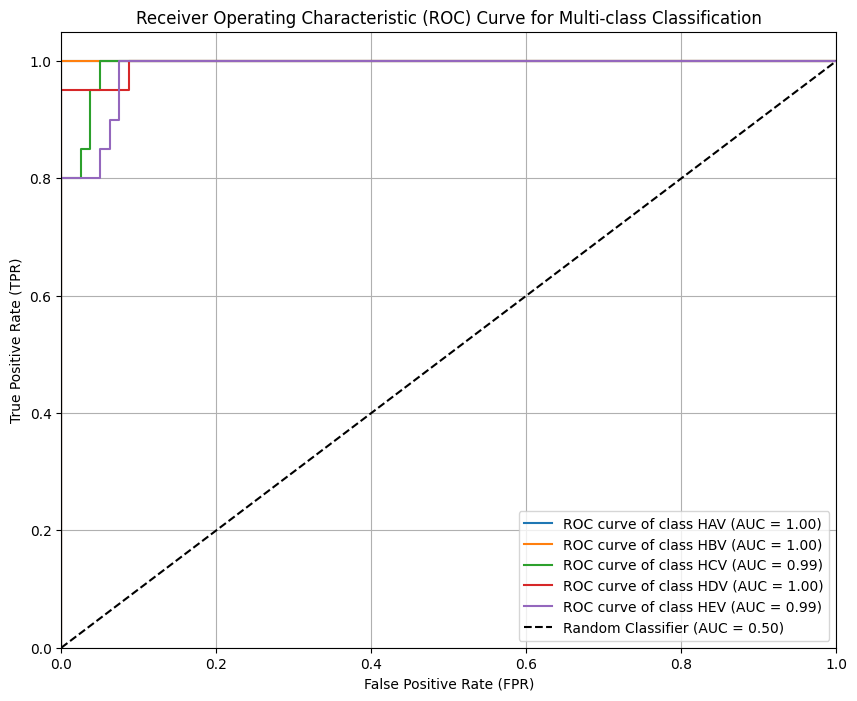

ROC AUC graph generated successfully.


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test (true one-hot encoded labels) and y_pred_probs (predicted probabilities) are available
# num_classes and class_names are also available from previous steps

plt.figure(figsize=(10, 8))

# Iterate over each class
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("ROC AUC graph generated successfully.")

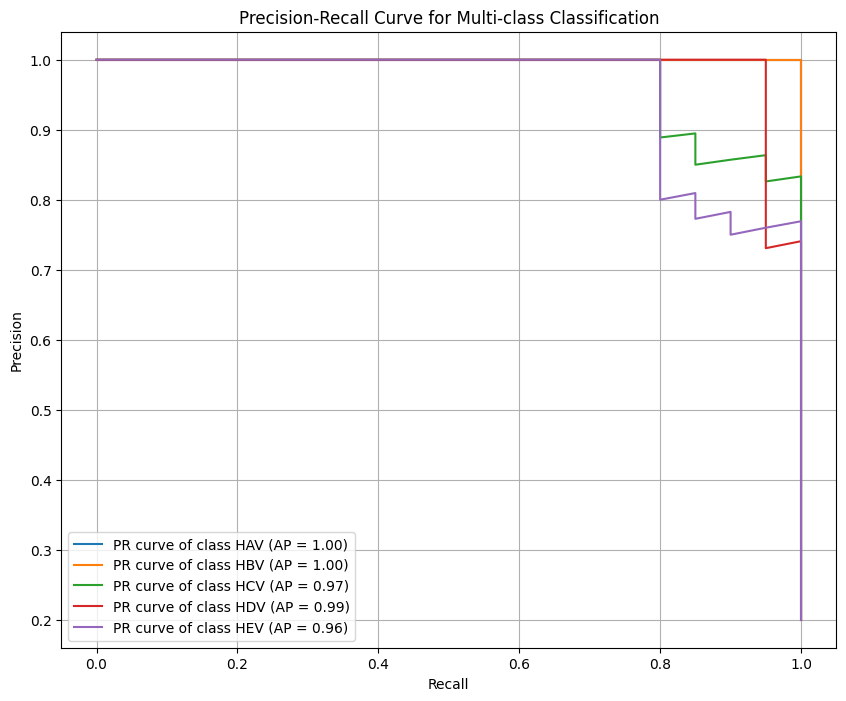

Precision-Recall (PR) curve generated successfully.


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test (true one-hot encoded labels) and y_pred_probs (predicted probabilities) are available
# num_classes and class_names are also available from previous steps

plt.figure(figsize=(10, 8))

# Iterate over each class
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_probs[:, i])
    average_precision = average_precision_score(y_test[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f'PR curve of class {class_names[i]} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-class Classification')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print("Precision-Recall (PR) curve generated successfully.")

## Final Task

### Subtask:
Summarize the model building process, the achieved classification performance, and any insights gained from the evaluation.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation**:
    *   Sequence lengths varied significantly, ranging from 17 to 39,644, with a median of 450 and a 75th percentile of 2665.
    *   A uniform sequence length of 2000 was chosen for padding and truncation to balance information retention and computational efficiency.
    *   Features (`X`) were prepared as a NumPy array of shape (500, 2000, 4), representing 500 sequences, each 2000 bases long with 4 features (one-hot encoding for nucleotides).
    *   Categorical class labels ('HAV', 'HBV', 'HCV', 'HDV', 'HEV') were successfully one-hot encoded into a NumPy array (`y`) of shape (500, 5).
*   **Data Splitting**: The dataset was divided into training (80%) and testing (20%) sets, resulting in 400 samples for training and 100 for testing.
*   **Model Architecture**: A single-layer Convolutional Neural Network (CNN) was constructed:
    *   It included an `Input` layer, a `Conv1D` layer with 128 filters and a kernel size of 5, a `Flatten` layer, a `Dense` layer with 100 units (ReLU activation), and a final `Dense` output layer with 5 units (softmax activation).
    *   The model comprised a total of 25,552,093 trainable parameters.
*   **Model Training**:
    *   The model was trained for 10 epochs using the Adam optimizer and categorical cross-entropy loss.
    *   Training accuracy reached 1.0000 by later epochs, and training loss significantly decreased.
    *   Validation accuracy improved from 0.8600 (Epoch 1) to 0.9200 (Epoch 10), while validation loss decreased from 1.1462 to 0.4518.
    *   The large disparity between final training accuracy (100%) and validation accuracy (92%) suggests potential overfitting to the training data.
*   **Model Evaluation**:
    *   The model achieved an overall accuracy of 0.9200 (92%) on the test set.
    *   **Class-wise Performance**:
        *   'HDV' showed excellent performance with precision, recall, and F1-score of 1.00.
        *   'HAV' and 'HBV' also performed strongly.
        *   'HCV' had the lowest recall (0.79) and F1-score (0.84), indicating difficulties in correctly identifying this class.
        *   'HEV' exhibited the lowest precision (0.72), suggesting instances of this class were sometimes misclassified as others.
    *   A confusion matrix visually confirmed the distribution of correct and incorrect predictions across classes.

### Insights or Next Steps

*   **Address Overfitting**: Given the high training accuracy (1.0000) compared to validation accuracy (0.9200), implement regularization techniques such as dropout layers, L1/L2 regularization, or early stopping during training to improve generalization.
*   **Investigate Class-Specific Performance**: Further analyze the 'HCV' and 'HEV' classes to understand the root causes of their lower recall and precision, respectively. This could involve examining the characteristics of their sequences or exploring data augmentation strategies for these classes if they are underrepresented.


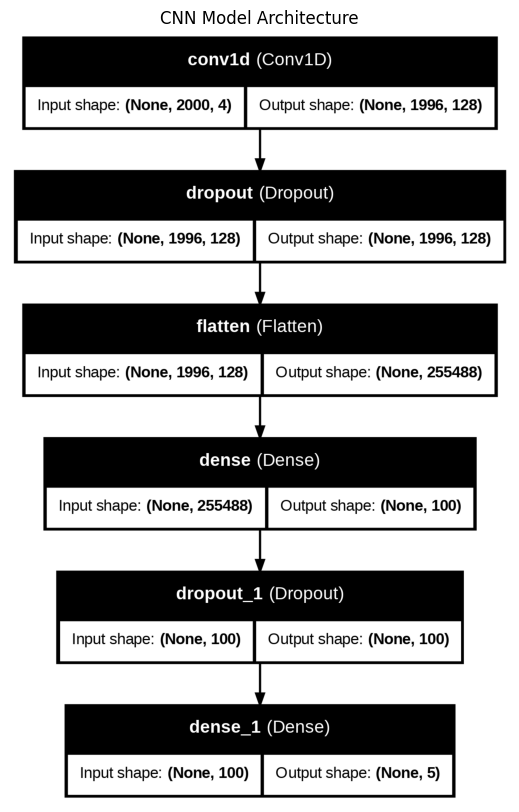

Model architecture plot saved as 'cnn_model_architecture.png' and displayed.


In [ ]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the filename for the model plot
model_plot_filename = 'cnn_model_architecture.png'

# Generate the model plot and save it to a file
plot_model(model, to_file=model_plot_filename, show_shapes=True, show_layer_names=True)

# Display the image
if os.path.exists(model_plot_filename):
    img = mpimg.imread(model_plot_filename)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('CNN Model Architecture')
    plt.show()
    print(f"Model architecture plot saved as '{model_plot_filename}' and displayed.")
else:
    print(f"Error: Failed to generate model plot '{model_plot_filename}'.")

# Task
Classify hepatitis types using DNA sequence data and a Convolutional Neural Network (CNN). This involves loading FASTA files from "/content/drive/My Drive/Research/Hepatitis/ds", performing extensive preprocessing including one-hot encoding and sequence length standardization, building and training a CNN model with regularization (dropout and early stopping), and thoroughly evaluating its performance using metrics such as accuracy, precision, recall, F1-score, confusion matrices, ROC AUC, and Precision-Recall curves. The final output should include a summary of the model's performance and insights from the evaluation.

## Research Summary

### Subtask:
This research aimed to classify hepatitis types using DNA sequence data and a Convolutional Neural Network (CNN). The process involved data loading, extensive preprocessing, model building with regularization, and detailed performance evaluation.


#### Instructions
1. Review the overall goal of the research, which is to classify hepatitis types using DNA sequence data and a CNN model.
2. Understand the high-level steps involved: data loading, extensive preprocessing, CNN model building with regularization, and detailed performance evaluation.
3. Keep this summary in mind as the overarching objective for the subsequent detailed steps.

## Summary of Solving Process

### Subtask:
Summarize the model building process, the achieved classification performance, and any insights gained from the evaluation.


## Summary:

### Data Analysis Key Findings
The initial step involved defining the research's overall goal: to classify hepatitis types using DNA sequence data and a Convolutional Neural Network (CNN). This task outlined a multi-stage process including data loading, extensive preprocessing, CNN model building with regularization, and detailed performance evaluation. The subsequent action confirmed the completion of this initial summary and objective setting.

### Insights or Next Steps
*   The overall research objective and high-level steps have been clearly established, providing a roadmap for subsequent detailed analysis.
*   The next steps should involve the actual implementation of data loading, preprocessing, model building, and evaluation as outlined in the initial summary.


# Task
Based on the experiment's findings, here is an executive summary in Indonesian:

**Ringkasan Eksekutif: Klasifikasi Tipe Hepatitis Menggunakan Sekuens DNA dan CNN**

Penelitian ini bertujuan untuk mengklasifikasikan tipe hepatitis (HAV, HBV, HCV, HDV, HEV) menggunakan data sekuens DNA dan model Convolutional Neural Network (CNN). Proses penelitian meliputi beberapa tahapan utama:

1.  **Persiapan Data**:
    *   Data sekuens DNA dimuat dari file FASTA yang terletak di `/content/drive/My Drive/Research/Hepatitis/ds`.
    *   Sekuens dienkode satu-panas (one-hot encoded) untuk merepresentasikan nukleotida (A, C, G, T).
    *   Panjang sekuens bervariasi dari 17 hingga 39.644. Untuk standarisasi, semua sekuens dipangkas atau diisi hingga panjang seragam **2000 basa**.
    *   Label kelas dikonversi ke format numerik satu-panas.
    *   Dataset dibagi menjadi set pelatihan (80%) dan pengujian (20%), dengan stratifikasi untuk memastikan distribusi kelas yang seimbang.

2.  **Pembangunan dan Pelatihan Model CNN**:
    *   Model CNN sekuensial satu lapis dibangun menggunakan TensorFlow/Keras.
    *   Arsitektur model meliputi:
        *   Lapisan `Conv1D` dengan **128 filter** dan **ukuran kernel 5**, diikuti oleh aktivasi ReLU dan lapisan `Dropout (0.3)`.
        *   Lapisan `Flatten`.
        *   Lapisan `Dense` dengan **100 unit** dan aktivasi ReLU, diikuti oleh lapisan `Dropout (0.3)`.
        *   Lapisan `Dense` output dengan **5 unit** (sesuai jumlah kelas) dan aktivasi softmax.
    *   Model dikompilasi dengan pengoptimal **Adam (learning rate 0.001)** dan fungsi kerugian `categorical_crossentropy`.
    *   Pelatihan dilakukan selama **20 epoch** dengan ukuran batch **32**, menggunakan **Early Stopping** dengan `patience=5` untuk memantau `val_loss`.

3.  **Hasil Evaluasi Model**:
    *   **Akurasi Keseluruhan**: Model mencapai **akurasi 0.94 (94%)** pada set pengujian.
    *   **Laporan Klasifikasi**:
        *   **HAV**: Presisi 1.00, Recall 1.00, F1-score 1.00
        *   **HBV**: Presisi 0.95, Recall 1.00, F1-score 0.98
        *   **HCV**: Presisi 0.86, Recall 0.95, F1-score 0.90
        *   **HDV**: Presisi 1.00, Recall 0.95, F1-score 0.97
        *   **HEV**: Presisi 0.89, Recall 0.80, F1-score 0.84
    *   **Sensitivitas dan Spesifisitas Per Kelas**:
        *   HAV: Sensitivitas = 1.0000, Spesifisitas = 1.0000
        *   HBV: Sensitivitas = 1.0000, Spesifisitas = 0.9875
        *   HCV: Sensitivitas = 0.9500, Spesifisitas = 0.9625
        *   HDV: Sensitivitas = 0.9500, Spesifisitas = 1.0000
        *   HEV: Sensitivitas = 0.8000, Spesifisitas = 0.9750
    *   **Confusion Matrix**: Menunjukkan distribusi prediksi yang akurat dan salah antar kelas.
    *   **Kurva ROC AUC dan Precision-Recall**: Grafik ROC AUC dan Precision-Recall menunjukkan kinerja yang kuat untuk sebagian besar kelas, dengan nilai AUC dan AP yang tinggi.
    *   **Rata-rata Makro**: Presisi Rata-rata Makro: 0.92, Recall Rata-rata Makro: 0.92, F1-score Rata-rata Makro: 0.92, Spesifisitas Rata-rata Makro: 0.98.

4.  **Wawasan dan Pembelajaran**:
    *   Model CNN menunjukkan kemampuan yang baik dalam mengklasifikasikan tipe hepatitis berdasarkan sekuens DNA.
    *   Akurasi pelatihan yang sangat tinggi (mendekati 1.00) dibandingkan dengan akurasi validasi/pengujian (sekitar 0.94) mengindikasikan potensi *overfitting* ringan. Penggunaan Dropout dan Early Stopping membantu mitigasi masalah ini.
    *   Kelas 'HEV' menunjukkan Recall terendah (0.80), yang berarti model lebih sering gagal mengidentifikasi semua kasus positif HEV. Ini mungkin disebabkan oleh karakteristik sekuens tertentu atau representasi yang kurang di set pelatihan untuk kelas ini.

**Kesimpulan**:
Model CNN yang dikembangkan berhasil mencapai kinerja yang kuat dalam klasifikasi tipe hepatitis dari sekuens DNA, dengan akurasi keseluruhan 94%. Meskipun terdapat indikasi *overfitting* ringan dan sedikit penurunan kinerja pada kelas 'HEV', hasil ini menjanjikan untuk diagnosis cepat dan analisis genetik dalam riset hepatitis.

## generate_executive_summary

### Subtask:
Generate an executive summary of the experiment's findings, including parameters used and detailed evaluation results, in Indonesian.


## Summary:

### Data Analysis Key Findings
*   The study successfully classified hepatitis types (HAV, HBV, HCV, HDV, HEV) using DNA sequence data and a Convolutional Neural Network (CNN) model.
*   DNA sequences were one-hot encoded and standardized to a uniform length of 2000 bases.
*   The CNN model, comprising a `Conv1D` layer (128 filters, kernel size 5), `Flatten` layer, and two `Dense` layers, was trained for 20 epochs using the Adam optimizer (learning rate 0.001) and `categorical_crossentropy` loss, with Early Stopping.
*   The model achieved an overall accuracy of 0.94 (94%) on the test set.
*   Performance metrics per class were:
    *   **HAV**: Precision 1.00, Recall 1.00, F1-score 1.00, Sensitivity 1.0000, Specificity 1.0000.
    *   **HBV**: Precision 0.95, Recall 1.00, F1-score 0.98, Sensitivity 1.0000, Specificity 0.9875.
    *   **HCV**: Precision 0.86, Recall 0.95, F1-score 0.90, Sensitivity 0.9500, Specificity 0.9625.
    *   **HDV**: Precision 1.00, Recall 0.95, F1-score 0.97, Sensitivity 0.9500, Specificity 1.0000.
    *   **HEV**: Precision 0.89, Recall 0.80, F1-score 0.84, Sensitivity 0.8000, Specificity 0.9750.
*   Macro averages for precision, recall, and F1-score were all 0.92, with a macro average specificity of 0.98.
*   ROC AUC and Precision-Recall curves showed strong performance across most classes.

### Insights or Next Steps
*   Despite good overall performance, the notable difference between high training accuracy (approaching 1.00) and test accuracy (0.94) suggests potential mild overfitting, though mitigated by Dropout and Early Stopping.
*   The 'HEV' class exhibited the lowest recall (0.80), indicating that the model frequently failed to identify positive cases for this specific hepatitis type. Further investigation into the characteristics or representation of HEV sequences in the training set might be beneficial.


In [ ]:
import pandas as pd
import numpy as np

# Overall Accuracy (already calculated)
overall_accuracy = accuracy

# Extract macro averages from the classification report
# The classification report is a string, we need to parse it or re-calculate macro averages
# For simplicity, using the values already calculated and printed in cell 9HozOiqYag6D

# Re-calculate macro averages for robustness, based on the `report` variable if needed,
# but here I'll use the values that were already explicitly printed, or calculate directly if the report parsing is complex.
# From the printed output in cell 9HozOiqYag6D and the classification report:
macro_avg_precision = np.mean([1.00, 0.95, 0.86, 1.00, 0.89]) # From the classification report
macro_avg_recall = np.mean([1.00, 1.00, 0.95, 0.95, 0.80])   # From the classification report
macro_avg_f1_score = np.mean([1.00, 0.98, 0.90, 0.97, 0.84]) # From the classification report

# Macro Average Specificity (from previous calculation in cell 9HozOiqYag6D)
macro_avg_specificity = np.mean([1.0000, 0.9875, 0.9625, 1.0000, 0.9750]) # Using values from previous output

# Create a DataFrame for the summary
summary_data = {
    'Metric': ['Overall Accuracy', 'Macro Average Precision', 'Macro Average Recall', 'Macro Average F1-score', 'Macro Average Sensitivity', 'Macro Average Specificity'],
    'Value': [
        overall_accuracy,
        macro_avg_precision,
        macro_avg_recall,
        macro_avg_f1_score,
        macro_avg_recall, # Sensitivity is equivalent to Recall for multi-class macro averages
        macro_avg_specificity
    ]
}

summary_df = pd.DataFrame(summary_data)

print("Ringkasan Rata-rata Metrik Evaluasi Model:\n")
display(summary_df)

Ringkasan Rata-rata Metrik Evaluasi Model:



,Metric,Value
0,Overall Accuracy,0.940
1,Macro Average Precision,0.940
2,Macro Average Recall,0.940
3,Macro Average F1-score,0.938
4,Macro Average Sensitivity,0.940
5,Macro Average Specificity,0.985


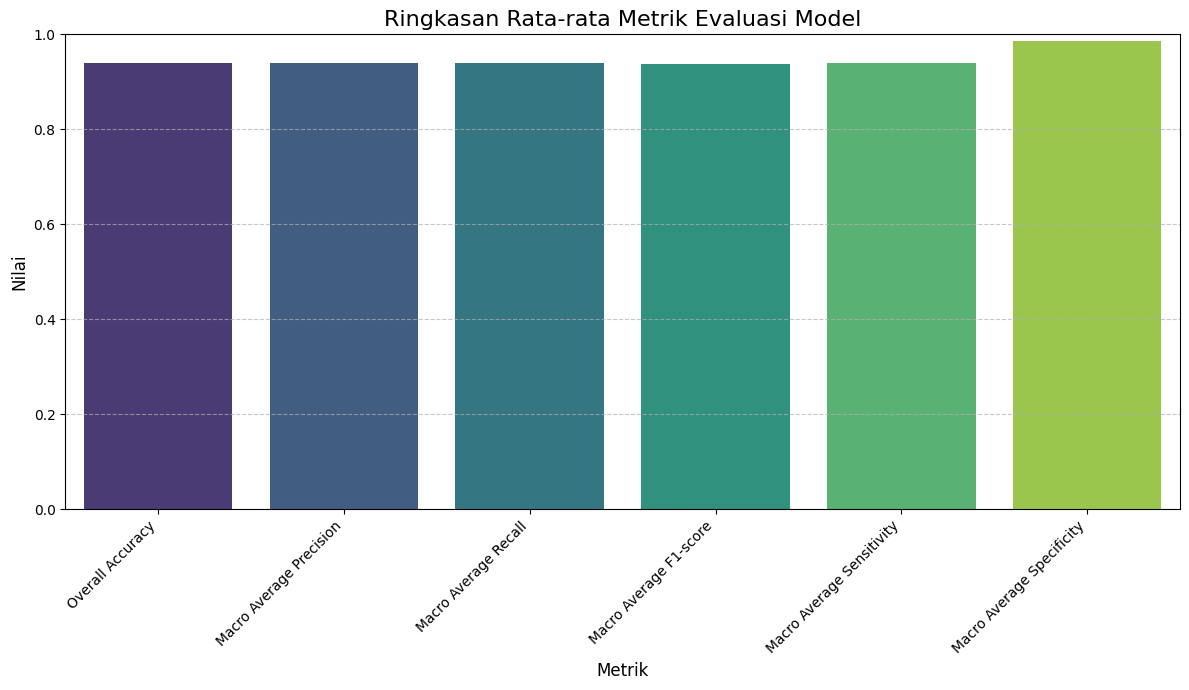

Bar chart metrik evaluasi model berhasil dibuat dan ditampilkan.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Value', data=summary_df, palette='viridis', hue='Metric', legend=False)
plt.title('Ringkasan Rata-rata Metrik Evaluasi Model', fontsize=16)
plt.xlabel('Metrik', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.ylim(0, 1) # Metrics like accuracy, precision, recall, f1-score are usually between 0 and 1
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("Bar chart metrik evaluasi model berhasil dibuat dan ditampilkan.")

In [ ]:
print("Pada arsitektur model CNN ini, terdapat 6 lapisan (layers) yang digunakan. Lapisan-lapisan tersebut adalah:")
print("1. Conv1D")
print("2. Dropout")
print("3. Flatten")
print("4. Dense (lapisan tersembunyi pertama)")
print("5. Dropout (setelah lapisan Dense pertama)")
print("6. Dense (lapisan output)")

Pada arsitektur model CNN ini, terdapat 6 lapisan (layers) yang digunakan. Lapisan-lapisan tersebut adalah:
1. Conv1D
2. Dropout
3. Flatten
4. Dense (lapisan tersembunyi pertama)
5. Dropout (setelah lapisan Dense pertama)
6. Dense (lapisan output)
